In [175]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

df= pd.read_csv(r'C:\Users\ABC\Downloads\brands.csv')
df.head(5)

,id,manufacturer_id,name,created_at,updated_at,alt_names,active,inactive_at,inactivated_by_user_id
0,1,1.0,ABB Brand,2016-09-07 02:06:02.495688,2016-09-07 02:06:02.495688,NaN,t,NaN,NaN
1,2,1.0,ABBLighting,2016-09-07 16:41:26.361125,2016-09-07 16:41:26.361125,NaN,t,NaN,NaN
2,3,4.0,HiLumz USA,2016-09-27 01:13:53.593774,2016-09-27 01:13:53.593774,NaN,t,NaN,NaN
3,4,5.0,LED DIRECT SUPPLY,2016-10-03 04:35:26.084827,2016-10-03 04:35:26.084827,NaN,t,NaN,NaN
4,5,6.0,LitespanLED,2016-10-03 04:35:26.207099,2016-10-03 04:35:26.207099,NaN,t,NaN,NaN


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      513 non-null    int64  
 1   manufacturer_id         511 non-null    float64
 2   name                    513 non-null    object 
 3   created_at              513 non-null    object 
 4   updated_at              513 non-null    object 
 5   alt_names               40 non-null     object 
 6   active                  513 non-null    object 
 7   inactive_at             0 non-null      float64
 8   inactivated_by_user_id  0 non-null      float64
dtypes: float64(3), int64(1), object(5)
memory usage: 36.2+ KB


In [177]:
df.shape

(513, 9)

**Checking Duplicate Rows**

In [178]:


df[df.duplicated()]


,id,manufacturer_id,name,created_at,updated_at,alt_names,active,inactive_at,inactivated_by_user_id


>No duplicate rows

**Checking the null values**

<AxesSubplot:>

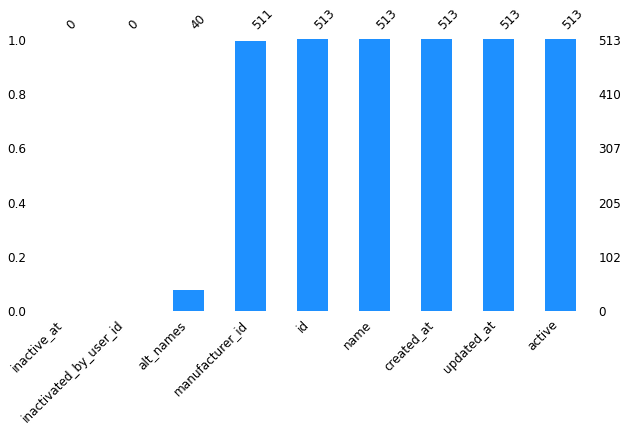

In [179]:
msno.bar(df ,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)



In [180]:
(df.isnull().sum()/len(df))*100

id                          0.000000
manufacturer_id             0.389864
name                        0.000000
created_at                  0.000000
updated_at                  0.000000
alt_names                  92.202729
active                      0.000000
inactive_at               100.000000
inactivated_by_user_id    100.000000
dtype: float64

>1. inactive_at and inactivated_by_user_id have 0 non - null values
>2. alt_names also has very high null values.

**Question : How many brands having alternate names are available?**

In [181]:
print('Number of brands having alternate names available :',len(df[df['alt_names'].notnull()]))
df[df['alt_names'].notnull()].head(5)

Number of brands having alternate names available : 40


,id,manufacturer_id,name,created_at,updated_at,alt_names,active,inactive_at,inactivated_by_user_id
52,63,49.0,Retrolux,2017-01-23 22:12:07.085703,2017-01-23 22:12:07.085703,---\n- retrolux\n- Retrolux\n- Retrolux\n- Ret...,t,NaN,NaN
56,45,36.0,MaxLite,2016-12-05 05:54:51.372657,2017-01-31 05:13:19.966955,---\n- Max Lite\n- Maxlite\n- maxlite\n,t,NaN,NaN
61,70,55.0,Shenzhen,2017-02-06 16:08:08.509119,2017-02-08 16:52:30.649067,---\n- Yaorong\n- Shenzhen Yaorong\n,t,NaN,NaN
62,67,53.0,WareLight,2017-01-31 16:01:46.722177,2017-02-08 16:53:31.488209,---\n- Warehouse Lighting\n,t,NaN,NaN
65,8,8.0,ATG Electronics,2016-10-03 04:35:26.375133,2017-03-20 21:06:47.291597,"---\n- ATG Electronics,Inc.\n- ATG Electronics...",t,NaN,NaN


**Dropping the columns with high number of null values**

In [182]:
df.drop(['inactive_at','inactivated_by_user_id','alt_names'] ,axis=1, inplace=True)

In [183]:
df.head(5)

,id,manufacturer_id,name,created_at,updated_at,active
0,1,1.0,ABB Brand,2016-09-07 02:06:02.495688,2016-09-07 02:06:02.495688,t
1,2,1.0,ABBLighting,2016-09-07 16:41:26.361125,2016-09-07 16:41:26.361125,t
2,3,4.0,HiLumz USA,2016-09-27 01:13:53.593774,2016-09-27 01:13:53.593774,t
3,4,5.0,LED DIRECT SUPPLY,2016-10-03 04:35:26.084827,2016-10-03 04:35:26.084827,t
4,5,6.0,LitespanLED,2016-10-03 04:35:26.207099,2016-10-03 04:35:26.207099,t


**Converting some columns to datetime**

In [184]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')
df['updated_at'] = pd.to_datetime(df['updated_at'], format='%Y-%m-%d %H:%M:%S')
df.head(5)

,id,manufacturer_id,name,created_at,updated_at,active
0,1,1.0,ABB Brand,2016-09-07 02:06:02.495688,2016-09-07 02:06:02.495688,t
1,2,1.0,ABBLighting,2016-09-07 16:41:26.361125,2016-09-07 16:41:26.361125,t
2,3,4.0,HiLumz USA,2016-09-27 01:13:53.593774,2016-09-27 01:13:53.593774,t
3,4,5.0,LED DIRECT SUPPLY,2016-10-03 04:35:26.084827,2016-10-03 04:35:26.084827,t
4,5,6.0,LitespanLED,2016-10-03 04:35:26.207099,2016-10-03 04:35:26.207099,t


**Question: How many records were updated at the same time of creation?**

In [185]:
print('Updated after creation :', len(df[df['created_at']< df['updated_at']]))
print('Updated at the same time of creation :', len(df[df['created_at'] == df['updated_at']]))



Updated after creation : 41
Updated at the same time of creation : 472


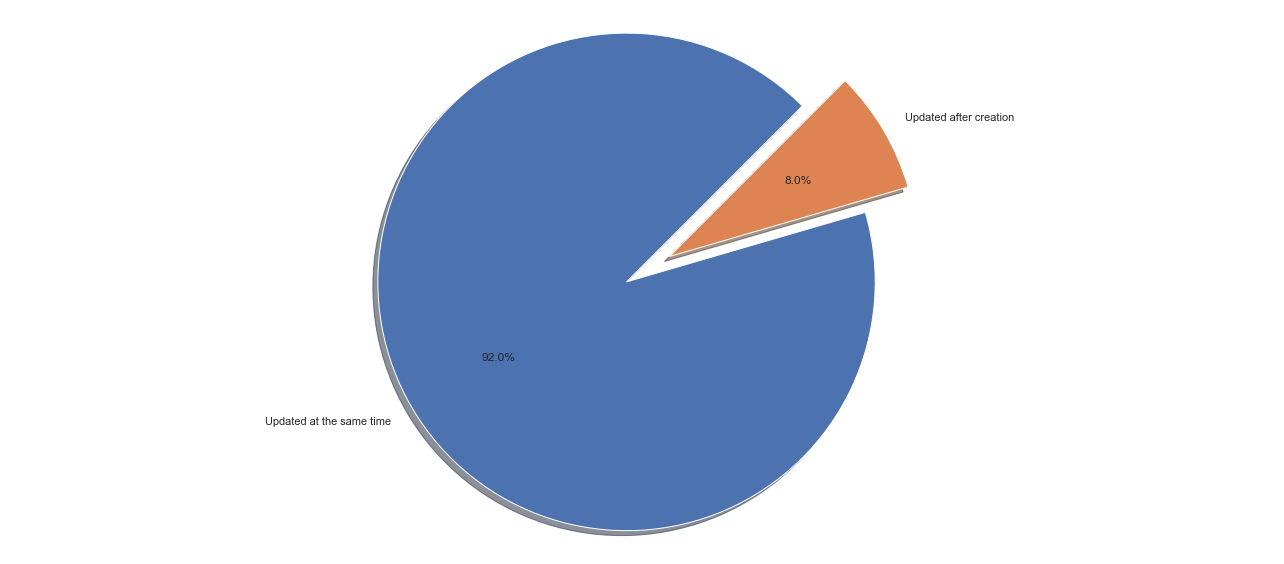

In [214]:
data=[['Updated at the same time', len(df[df['created_at'] == df['updated_at']])], ['Updated after creation',len(df[df['created_at']< df['updated_at']])]]

x=pd.DataFrame(data,columns=['Time_of_updation','coun'])
fig1, ax1 = plt.subplots()
ax1.pie(x['coun'], explode=[.1,.1], labels=x['Time_of_updation'], autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

**Question : Average time of updation ?**

In [187]:
(df['updated_at'] - df['created_at']).describe()


count                            513
mean      30 days 19:59:33.199305770
std      174 days 09:17:13.348781484
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                  0 days 00:00:00
max        1570 days 07:43:21.532875
dtype: object

> 30 days and 19 hours. 

**Question:How many brands are active ?**

In [188]:
print('Percentage of active brands :',(len(df[df['active']=='t'])/ len(df))*100, '%')

Percentage of active brands : 99.80506822612085 %


**Question: Brands having more than 1 Manufacturing id?**

In [189]:
x=df.pivot_table(index = ['name'], aggfunc ='size')
x=x[x>1]
x=x.sort_values()


Text(0.5, 1.0, 'Brands having more than 1 manufacturing id')

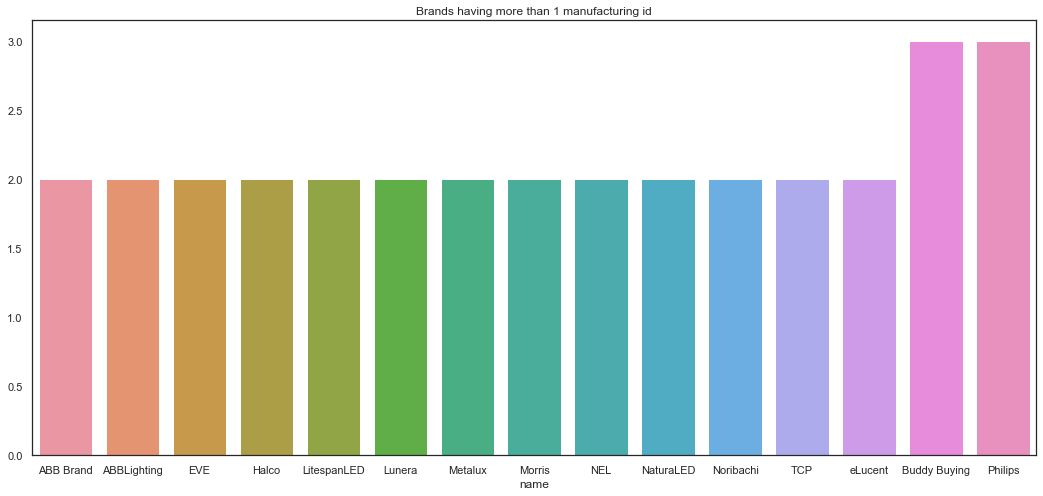

In [203]:
sns.set(rc={'figure.figsize':(18,8)})
sns.set_style(style='white')

sns.barplot(x=x.index, y = x).set_title('Brands having more than 1 manufacturing id')


**Question: Unique brand names?**

In [191]:
print("Number of Brands having unique names : ",len(pd.unique(df['name'])))


Number of Brands having unique names :  496
